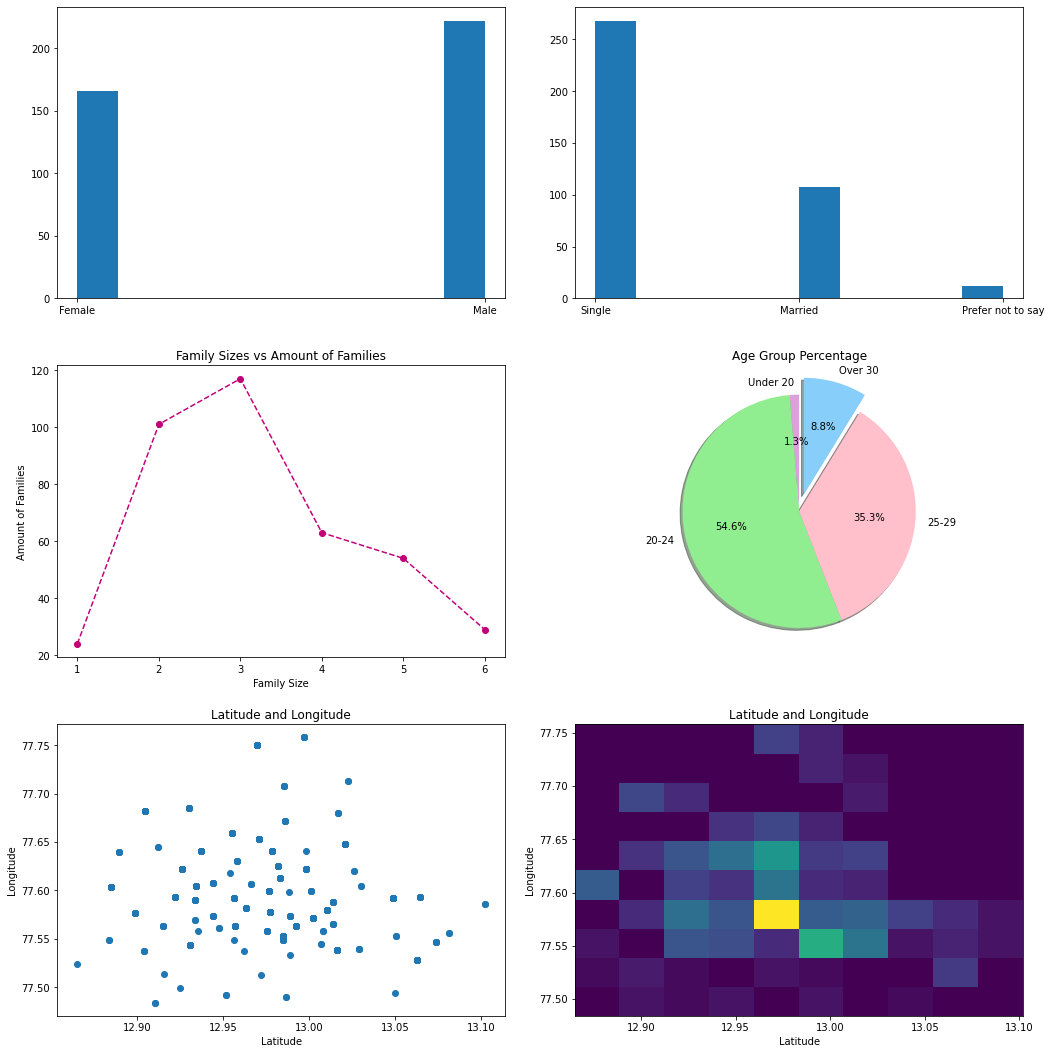

In [140]:
from extract import extract # import the external extract class
from transform import transform # import the external extract class
from load import load # import the external load class
 
# your code here
e = extract()
dataset = e.fromCSV(file_path="delivery/delivery.csv")

# Pie Chart Info/Dictionary
# Extract age set within a new dictionary
ages = dict()

for age in dataset:
    for k, v in age.items():
        if k == "Age" and v not in ages:
            ages[v] = 1
        elif k == "Age" and v in ages:
            val = ages[v]
            val += 1
            ages[v] = val
        else:
            pass
        
total_20 = 0
total_20_25 = 0
total_25_30 = 0
total_over_30 = 0

labels = ['Under 20', '20-24', '25-29', 'Over 30']         
amount = list()

for item in ages:
    if int(item) < 20:
        total_20 += ages.get(item)
    elif int(item) >= 20 and int(item) < 25:
        total_20_25 += ages.get(item)
    elif int(item) >= 25 and int(item) < 30:
        total_25_30 += ages.get(item)
    else:
        total_over_30 += ages.get(item)

amount.append(total_20)
amount.append(total_20_25)
amount.append(total_25_30)
amount.append(total_over_30)

total = 0

for i in amount:
    total += i

percentage = list()

for i in amount:
    percent = i / total
    percentage.append(round(percent * 100, 2))


# Line Chart Info/Dictionary
# Extract family size set within a new dictionary
fam_size = dict()

for size in dataset:
    for k, v in size.items():
        if k == "Family size" and v not in fam_size:
            fam_size[v] = 1
        elif k == "Family size" and v in fam_size:
            val = fam_size[v]
            val += 1
            fam_size[v] = val
        else:
            pass
        
# Graph Chart Females/Males
fem_male = list()

for people in dataset:
    for k, v in people.items():
        if k == "Gender":
            fem_male.append(v)
        else:
            pass
        
# Graph Chart Single, Married, Other
mar_stat = list()

for status in dataset:
    for k, v in status.items():
        if k == "Marital Status":
            mar_stat.append(v)
        else:
            pass
        
# Scatterplot&Hist2D Info Latitude/Longitude
# Transform the data
t = transform()
renamed_dataset = t.rename_attributes(dataset=dataset, old=["latitude", "longitude"], new=["Latitude", "Longitude"])

latitude = list()

for lat in renamed_dataset:
    for k, v in lat.items():
        if k == "Latitude":
            latitude.append(float(v))
        else:
            pass

longitude = list()

for lon in renamed_dataset:
    for k, v in lon.items():
        if k == "Longitude":
            longitude.append(float(v))
        else:
            pass
        
# Grid System
fig, axs = plot.subplots(3, 2, figsize=(15, 15))

# Definitions
colors = ['#DDA0DD', '#90EE90', '#FFC0CB', 'lightskyblue']
explode = (0, 0, 0, 0.15)

# First histogram Male&Female counts
axs[0, 0].hist(fem_male)

# Second histogram Single, Married, Other counts
axs[0, 1].hist(mar_stat)

# Line Graph Family Sizes and counts
axs[1, 0].plot(x, y,color='#C20078', marker='o', linestyle='dashed') 
axs[1, 0].set_title( 'Family Sizes vs Amount of Families' )
axs[1, 0].xaxis.set_label_text( 'Family Size' )
axs[1, 0].yaxis.set_label_text( 'Amount of Families' )

# Pie Chart Age groups and percentages
axs[1, 1].pie(percentage, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
axs[1, 1].set_title( 'Age Group Percentage' )

# Scatterplot Latitude/Longitude showing points of residence
axs[2, 0].scatter(latitude, longitude)
axs[2, 0].set_title( 'Latitude and Longitude' )
axs[2, 0].xaxis.set_label_text( 'Latitude' )
axs[2, 0].yaxis.set_label_text( 'Longitude' )

# 2D Histogram Latitude/Longitude showing concentration of residence
axs[2, 1].hist2d(latitude, longitude)
axs[2, 1].set_title( 'Latitude and Longitude' )
axs[2, 1].xaxis.set_label_text( 'Latitude' )
axs[2, 1].yaxis.set_label_text( 'Longitude' )

plot.tight_layout(pad=2)
plot.show()


# Load the csv file
l = load()
l.toCSV(file_path = "delivery_copy.csv", dataset = renamed_dataset)
